In [1]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the CSV Files into DataFrames

landslide_orig = pd.read_csv("landslide_data3_original.csv")
landslide_miss = pd.read_csv("landslide_data3_miss.csv")

In [3]:
print(landslide_orig)
print(landslide_miss)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10     24.29851  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9     16.65926  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000      4000    0.0000  
1         11.8448  

dates            0
stationid       19
temperature     66
humidity        45
pressure        77
rain            38
lightavgw/o0    47
lightmax        31
moisture        31
dtype: int64


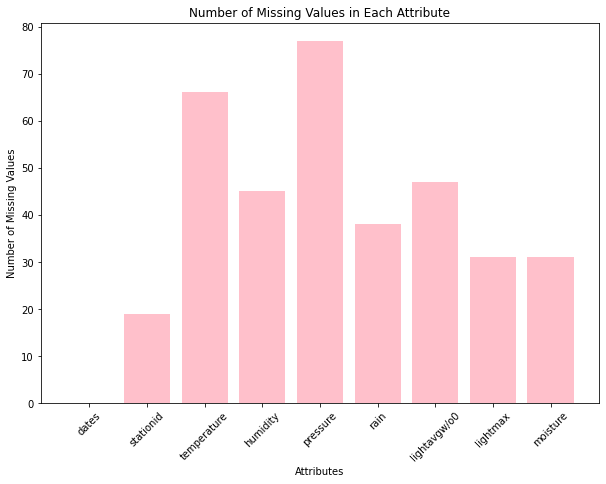

In [4]:
# QUESTION-1: Plot a Graph of the Attribute Names with the Number of Missing Values in Them
missing_vals = landslide_miss.isna().sum()
print(missing_vals)
plt.figure(figsize = (10, 7))
plt.bar(missing_vals.index, missing_vals.values, color = 'pink')
plt.xticks(rotation = 45)
plt.xlabel("Attributes")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Attribute")
plt.show()

In [5]:
# QUESTION-2(A): Drop the tuples with missing values in 'stationid'

target = 'stationid'
temp_df = landslide_miss.dropna(axis = 'index', subset = [target])
print("Number of tuples being deleted =", (len(landslide_miss) - len(temp_df)))
landslide_miss = temp_df.copy()
del temp_df

Number of tuples being deleted = 19


In [6]:
# QUESTION-2(B): Drop the tuples with one-third or more missing attributes

col_count = len(landslide_miss.columns)
permitted_miss = col_count/3

more_miss_index = landslide_miss[landslide_miss.isna().sum(axis = 1) >= permitted_miss].index
temp_df = landslide_miss.drop(more_miss_index)
print("Number of tuples being deleted =", (len(landslide_miss) - len(temp_df)))
landslide_miss = temp_df.copy()
del temp_df

Number of tuples being deleted = 35


In [7]:
# QUESTION -3: Number of Missing Values in each column

missing_vals = landslide_miss.isna().sum()
print("Column-wise number of missing values:")
print(missing_vals)
print()
print("Total number of missing values:")
print(missing_vals.sum())

Column-wise number of missing values:
dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64

Total number of missing values:
116


In [8]:
# QUESTION-4(A): Replacing the missing value by Mean

mean_filled_df = landslide_miss.copy()
replaced_indices={} # Keeps record of changed tuples for each column
replaced_values={} # Keeps record of the mean that has been filled for each column

for attribute in landslide_miss.columns:
    if mean_filled_df[attribute].isna().sum() != 0:
        replaced_indices[attribute] = list(mean_filled_df[mean_filled_df[attribute].isna()].index)
        replaced_values[attribute] = mean_filled_df[attribute].mean(skipna = True)
        mean_filled_df[attribute].fillna((mean_filled_df[attribute].mean(skipna = True)), inplace = True)
print(mean_filled_df)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10    25.468750  82.18750  1036.346875      6.75   
1    09-07-2018       t10    26.192980  83.14912  1037.604386   1761.75   
2    10-07-2018       t10    25.170210  85.34043  1037.889362    652.50   
3    11-07-2018       t10    21.052444  87.68657  1036.857463    963.00   
4    12-07-2018       t10    24.069230  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9    21.052444  58.69630  1026.797407  73577.25   
941  22-11-2018        t9    15.524820  63.16312  1027.495248  65301.75   
942  23-11-2018        t9    15.815600  59.21277  1029.318511  73534.50   
943  24-11-2018        t9    16.585710  54.63571  1026.776357  72283.50   
944  25-11-2018        t9    17.900000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax   moisture  
0          5.5000    4000.0   0.000000  
1         11.8448

In [9]:
# Part i: Comparing parameters of the original and changed DataFrame

# Comparing Mean

mean_orig = landslide_orig.mean(numeric_only = True)
mean_new = mean_filled_df.mean(numeric_only = True)
mean_df = pd.DataFrame({'Original Data': mean_orig, 'New Data': mean_new})
print("Comparing the mean of original and new data:")
print(mean_df)
print()

# Comparing Median

median_orig = landslide_orig.median(numeric_only = True)
median_new = mean_filled_df.median(numeric_only = True)
median_df = pd.DataFrame({'Original Data': median_orig, 'New Data': median_new})
print("Comparing the median of original and new data:")
print(median_df)
print()

# Comparing Mode

mode_orig = landslide_orig.mode(numeric_only = True).T
mode_new = mean_filled_df.mode(numeric_only = True).T
mode_df = pd.DataFrame({'Original Data': mode_orig[0], 'New Data': mode_new[0]})
print("Comparing the mode of original and new data:")
print(mode_df)
print()

# Comparing Standard Deviation

std_orig = landslide_orig.std(numeric_only = True)
std_new = mean_filled_df.std(numeric_only = True)
std_df = pd.DataFrame({'Original Data': std_orig, 'New Data': std_new})
print("Comparing the std of original and new data:")
print(std_df)
print()

Comparing the mean of original and new data:
              Original Data      New Data
temperature       21.214888     21.052444
humidity          83.479932     83.125974
pressure        1009.008774   1009.465871
rain           10701.538370  10798.378825
lightavgw/o0    4438.428453   4458.297802
lightmax       21788.623280  21463.221348
moisture          32.386053     32.602872

Comparing the median of original and new data:
              Original Data     New Data
temperature       22.272730    21.927010
humidity          91.380950    91.000000
pressure        1014.677832  1014.482302
rain              18.000000    15.750000
lightavgw/o0    1656.880000  1502.938500
lightmax        6634.000000  6569.000000
moisture          16.704200    14.169500

Comparing the mode of original and new data:
              Original Data     New Data
temperature       12.727270    21.052444
humidity          99.000000    99.000000
pressure         789.392692  1009.465871
rain               0.000000     0

In [10]:
# Part ii: Root Mean Square Error

print("Values have been replaced at indices: ")
print(replaced_indices)
print()

print("The mean values with which replacement has been made:")
print(replaced_values)
print()

rmse = {}

for k in replaced_indices:
    dev_sq = []
    for i in replaced_indices[k]:
        dev_sq.append((landslide_orig.loc[i,k] - replaced_values[k])**2)
    rmse[k] = (sum(dev_sq)/len(dev_sq)) ** 0.5

attribute_list = []
rmse_list = []

print("Root Mean Square Errors for the replaced values for each column are: ")
for k in rmse:
    print(k,":",rmse[k])
    attribute_list.append(k)
    rmse_list.append(rmse[k])
print()
   

Values have been replaced at indices: 
{'temperature': [3, 9, 25, 29, 91, 159, 190, 198, 222, 223, 224, 225, 226, 227, 228, 229, 230, 239, 248, 371, 372, 373, 602, 603, 604, 605, 606, 730, 754, 758, 787, 819, 853, 940], 'humidity': [58, 91, 143, 150, 155, 156, 158, 296, 602, 603, 604, 605, 606], 'pressure': [7, 17, 30, 31, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 161, 165, 188, 189, 190, 191, 239, 291, 308, 518, 519, 520, 521, 522, 523, 524, 683, 694, 722, 912, 913, 914, 915, 916, 917], 'rain': [12, 16, 27, 58, 144, 168], 'lightavgw/o0': [146, 150, 198, 199, 200, 201, 202, 203, 204, 251, 301, 686, 692, 726, 905], 'lightmax': [905], 'moisture': [2, 5, 16, 250, 686, 907]}

The mean values with which replacement has been made:
{'temperature': 21.052443978996514, 'humidity': 83.12597403189076, 'pressure': 1009.4658713583344, 'rain': 10798.378824858757, 'lightavgw/o0': 4458.297802397258, 'lightmax': 21463.221348314608, 'moisture': 32.60287186440678}

Root Mean Square Errors for the r

['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']
[3.6572294555826557, 6.953065068697543, 21.059203835808272, 10539.429262280151, 2055.502853820539, 9424.778651685392, 37.01225832732493]


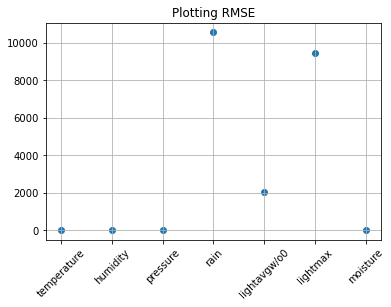

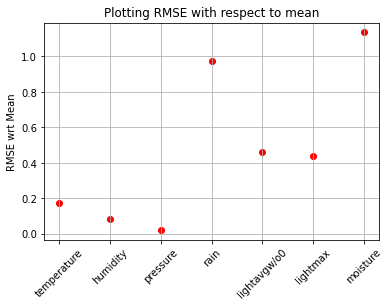

In [11]:
# Plotting the RMSE for each attribute

print(attribute_list)
print(rmse_list)

plt.scatter(attribute_list, rmse_list)
plt.title("Plotting RMSE")
plt.xticks(rotation = 45)
plt.grid()
plt.show()
print()

# RMSE with respect to mean of the concerned colummns

rmse_wrt_mean = []
for k in attribute_list:
    rmse_wrt_mean.append(rmse[k]/replaced_values[k])

plt.title("Plotting RMSE with respect to mean")
plt.ylabel("RMSE wrt Mean")
plt.scatter(attribute_list, rmse_wrt_mean, c = "red")
plt.xticks(rotation = 45)
plt.grid()
plt.show()
    

In [12]:
# QUESTION-4(B): Replacing the missing value by Interpolation

interpol_df = landslide_miss.copy()

for attribute in landslide_miss.columns:
    if interpol_df[attribute].isna().sum() != 0:
        interpol_df[attribute].interpolate(method = 'linear', inplace = True)
print(interpol_df)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10     24.61972  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9     13.80851  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000    4000.0   0.00000  
1         11.8448  

In [13]:
# Part i: Comparing parameters of the original and changed DataFrame

# Comparing Mean

mean_new2 = interpol_df.mean(numeric_only = True)
mean_df2 = pd.DataFrame({'Original Data': mean_orig, 'New Data': mean_new2})
print("Comparing the mean of original and new data:")
print(mean_df2)
print()

# Comparing Median

median_new2 = interpol_df.median(numeric_only = True)
median_df2 = pd.DataFrame({'Original Data': median_orig, 'New Data': median_new2})
print("Comparing the median of original and new data:")
print(median_df2)
print()

# Comparing Mode

mode_new2 = interpol_df.mode(numeric_only = True).T
mode_df2 = pd.DataFrame({'Original Data': mode_orig[0], 'New Data': mode_new2[0]})
print("Comparing the mode of original and new data:")
print(mode_df2)
print()

# Comparing Standard Deviation

std_new2 = interpol_df.std(numeric_only = True)
std_df2 = pd.DataFrame({'Original Data': std_orig, 'New Data': std_new2})
print("Comparing the std of original and new data:")
print(std_df2)
print()

Comparing the mean of original and new data:
              Original Data      New Data
temperature       21.214888     21.114539
humidity          83.479932     83.165602
pressure        1009.008774   1009.968097
rain           10701.538370  10727.959186
lightavgw/o0    4438.428453   4496.753851
lightmax       21788.623280  21473.799102
moisture          32.386053     32.528672

Comparing the median of original and new data:
              Original Data     New Data
temperature       22.272730    22.139860
humidity          91.380950    91.179860
pressure        1014.677832  1014.925145
rain              18.000000    15.750000
lightavgw/o0    1656.880000  1500.500000
lightmax        6634.000000  6569.000000
moisture          16.704200    13.894400

Comparing the mode of original and new data:
              Original Data     New Data
temperature       12.727270    12.727270
humidity          99.000000    99.000000
pressure         789.392692   789.392692
rain               0.000000     0

In [14]:
# Part ii: Root Mean Square Error

print("Values have been replaced at indices: ")
print(replaced_indices)
print()

rmse2 = {}

for k in replaced_indices:
    dev_sq2 = []
    for i in replaced_indices[k]:
        dev_sq2.append((landslide_orig.loc[i,k] - interpol_df.loc[i,k])**2)
    rmse2[k] = (sum(dev_sq2)/len(dev_sq2)) ** 0.5

rmse_list2 = []

print("Root Mean Square Errors for the replaced values for each column are: ")
for k in rmse:
    print(k,":",rmse2[k])
    rmse_list2.append(rmse2[k])
print()

Values have been replaced at indices: 
{'temperature': [3, 9, 25, 29, 91, 159, 190, 198, 222, 223, 224, 225, 226, 227, 228, 229, 230, 239, 248, 371, 372, 373, 602, 603, 604, 605, 606, 730, 754, 758, 787, 819, 853, 940], 'humidity': [58, 91, 143, 150, 155, 156, 158, 296, 602, 603, 604, 605, 606], 'pressure': [7, 17, 30, 31, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 161, 165, 188, 189, 190, 191, 239, 291, 308, 518, 519, 520, 521, 522, 523, 524, 683, 694, 722, 912, 913, 914, 915, 916, 917], 'rain': [12, 16, 27, 58, 144, 168], 'lightavgw/o0': [146, 150, 198, 199, 200, 201, 202, 203, 204, 251, 301, 686, 692, 726, 905], 'lightmax': [905], 'moisture': [2, 5, 16, 250, 686, 907]}

Root Mean Square Errors for the replaced values for each column are: 
temperature : 1.3294361526755403
humidity : 6.323695638280403
pressure : 6.180435710552927
rain : 233.41558632083678
lightavgw/o0 : 7328.810637078913
lightmax : 0.0
moisture : 15.429733604027321



['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']
[1.3294361526755403, 6.323695638280403, 6.180435710552927, 233.41558632083678, 7328.810637078913, 0.0, 15.429733604027321]


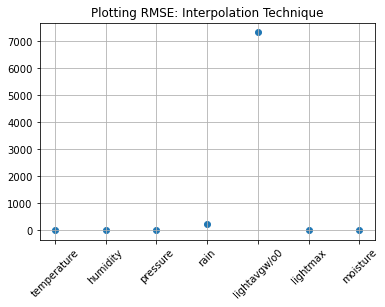

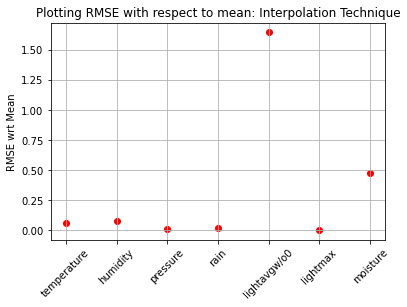

In [15]:
# Plotting the RMSE for each attribute

print(attribute_list)
print(rmse_list2)

plt.scatter(attribute_list, rmse_list2)
plt.title("Plotting RMSE: Interpolation Technique")
plt.xticks(rotation = 45)
plt.grid()
plt.show()
print()

# RMSE with respect to mean of the concerned colummns

rmse_wrt_mean2 = []
for k in attribute_list:
    rmse_wrt_mean2.append(rmse2[k]/replaced_values[k])

plt.title("Plotting RMSE with respect to mean: Interpolation Technique")
plt.ylabel("RMSE wrt Mean")
plt.scatter(attribute_list, rmse_wrt_mean2, c = "red")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

For Temperature: 

First Quartile: 18.003495
Third Quartile: 24.411911
IQR: 6.408415999999999

Outliers in Temperature: 
[7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729]
----------------------------------------



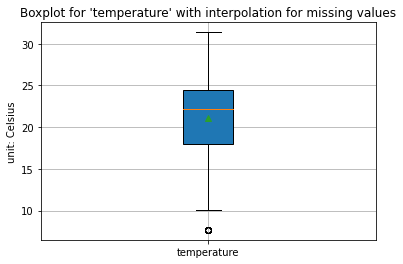

In [16]:
# QUESTION-5(A): Finding Outliers for 'temperature' and plotting the boxplot

print("For Temperature: ")
print()

q1_temp = interpol_df.temperature.quantile(0.25)
q3_temp = interpol_df.temperature.quantile(0.75)
IQR_temp = q3_temp - q1_temp

print("First Quartile:", q1_temp)
print("Third Quartile:", q3_temp)
print("IQR:", IQR_temp)
print()

outliers_temp = [] # List of Outliers
for i in interpol_df.temperature:
    if (i < (q1_temp-(1.5*IQR_temp))) or (i > (q3_temp+(1.5*IQR_temp))):
        outliers_temp.append(i)
print("Outliers in Temperature: ")
print(outliers_temp)

print("-"*40)
print()

plt.boxplot(interpol_df.temperature, patch_artist = True, showmeans = True)
plt.title("Boxplot for 'temperature' with interpolation for missing values")
plt.xticks([1],['temperature'])
plt.ylabel("unit: Celsius")
plt.grid()
plt.show()



For Rain: 

First Quartile: 0.0
Third Quartile: 1041.75
IQR: 1041.75

Outliers in Rain: 
[13583.25, 15459.75, 14001.75, 16571.25, 13666.5, 59982.75, 80000.0, 75048.75, 3930.5, 36636.75, 40789.0, 63256.5, 54616.5, 50172.75, 37928.25, 26178.75, 3138.75, 3449.25, 18884.25, 9765.0, 18976.5, 30393.0, 2814.75, 80000.0, 82037.25, 56319.75, 71968.5, 80000.0, 80000.0, 50242.5, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 60675.75, 22250.25, 2637.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 37392.75, 49725.0, 80000.0, 80000.0, 71154.0, 80000.0, 80000.0, 12854.25, 34879.5, 4610.25, 6210.0, 10557.0, 3451.5, 3312.0, 18285.75, 3613.5, 2893.5, 23474.25, 14042.25, 3647.25, 5877.0, 10062.0, 17997.75, 29517.75, 32514.75, 13943.25, 4212.0, 4691.25, 7519.5, 11112.

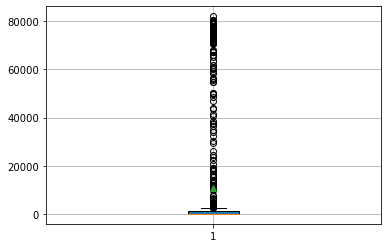

In [17]:
# Finding Outliers for 'rain' and plotting the boxplot

print("For Rain: ")
print()

q1_rain = interpol_df.rain.quantile(0.25)
q3_rain = interpol_df.rain.quantile(0.75)
IQR_rain = q3_rain - q1_rain

print("First Quartile:", q1_rain)
print("Third Quartile:", q3_rain)
print("IQR:", IQR_rain)
print()

outliers_rain = []
for i in interpol_df.rain:
    if (i < (q1_rain-(1.5*IQR_rain))) or (i > (q3_rain+(1.5*IQR_rain))):
        outliers_rain.append(i)
print("Outliers in Rain: ")
print(outliers_rain)

print("-"*40)
print()

plt.boxplot(interpol_df.rain, patch_artist = True, showmeans = True)
plt.grid()
plt.show()


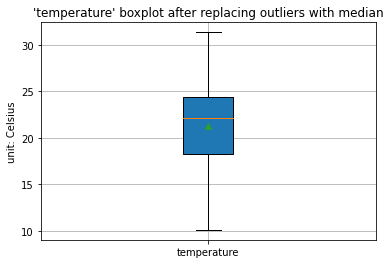

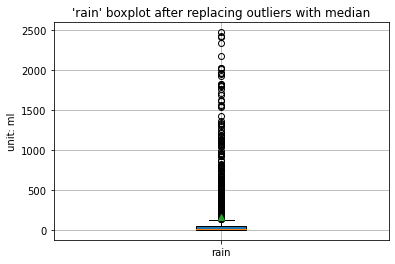

In [18]:
# (B): Replacing Outliers by Median

# Calculating median
temp_med = interpol_df.temperature.median()
rain_med = interpol_df.rain.median()

# Creating another DataFrame with outliers replaced with Median
outliers_rep_df = interpol_df.copy()
for i in outliers_rep_df.index:
    x = outliers_rep_df.loc[i, 'temperature']
    y = outliers_rep_df.loc[i, 'rain']
    if (x < (q1_temp-(1.5*IQR_temp))) or (x > (q3_temp+(1.5*IQR_temp))):
        outliers_rep_df.loc[i, 'temperature'] = temp_med
    if (y < (q1_rain-(1.5*IQR_rain))) or (y > (q3_rain+(1.5*IQR_rain))):
        outliers_rep_df.loc[i, 'rain'] = rain_med
        
# Boxplots

# Boxplot for temperature
plt.boxplot(outliers_rep_df.temperature, patch_artist = True, showmeans = True)
plt.title("'temperature' boxplot after replacing outliers with median")
plt.xticks([1],['temperature'])
plt.ylabel("unit: Celsius")
plt.grid()
plt.show()

# Boxplot for rain (Plotted separately because of difference in range with temperature)
plt.boxplot(outliers_rep_df.rain, patch_artist = True, showmeans = True)
plt.title("'rain' boxplot after replacing outliers with median")
plt.xticks([1],['rain'])
plt.ylabel("unit: ml")
plt.grid()
plt.show()